In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("salesCG201718.xls")
df = df.T.reset_index(drop=True).T
df = df.dropna()

In [3]:
coln = ['shop']
for i in range(1,21):
    coln.append("S"+str(i))
    coln.append("S"+str(i))  
    
row_df = pd.DataFrame([coln])
df = pd.concat([row_df, df], ignore_index=True)
df

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,shop,S1,S1,S2,S2,S3,S3,S4,S4,S5,...,S16,S16,S17,S17,S18,S18,S19,S19,S20,S20
1,daily sale,P1,P2,P1,P2,P1,P2,P1,P2,P1,...,P1,P2,P1,P2,P1,P2,P1,P2,P1,P2
2,2015-01-01 00:00:00,3,6,2,7,1,1,1,12,1,...,9,5,2,0,1,9,1,1,4,12
3,2015-01-02 00:00:00,2,3,1,8,4,3,4,9,4,...,5,9,2,11,2,1,1,10,1,12
4,2015-01-03 00:00:00,1,9,2,7,4,14,1,3,1,...,7,10,5,8,4,12,2,6,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,2015-12-26 00:00:00,0,4,0,14,0,1,0,8,0,...,0,30,0,11,0,11,0,13,0,15
311,2015-12-28 00:00:00,0,5,0,7,0,9,0,2,0,...,0,12,0,2,0,13,0,5,0,18
312,2015-12-29 00:00:00,0,5,0,9,0,12,0,11,0,...,0,17,0,8,0,0,0,9,0,3
313,2015-12-30 00:00:00,0,5,0,5,0,8,0,17,0,...,0,32,0,0,0,7,0,5,0,11


In [4]:
df = df.set_index(0).T.groupby(["shop","daily sale"]).sum().T
df


shop       S1    S10     S11     S12     S13      ... S5     S6     S7     S8  \
daily sale P1 P2  P1  P2  P1  P2  P1  P2  P1  P2  ... P1  P2 P1  P2 P1  P2 P1   
2015-01-01  3  6   4  10   6  17   2   5   4  13  ...  1   2  3  10  4  11  3   
2015-01-02  2  3   0   8   3  16   6  19   3   9  ...  4   3  5   2  5  19  3   
2015-01-03  1  9   6   4   6   1   3  12   7  14  ...  1   4  3   5  1   7  5   
2015-01-05  3  8   3  18   6   8   5  18   4  20  ...  3   7  4  10  6   1  5   
2015-01-06  0  5   3   3   2  14   6   3   5  16  ...  3  11  1  12  1  22  3   
...        .. ..  ..  ..  ..  ..  ..  ..  ..  ..  ... ..  .. ..  .. ..  .. ..   
2015-12-26  0  4   0   1   0  21   0   3   0   3  ...  0  11  0  18  0  30  0   
2015-12-28  0  5   0  10   0  20   0  15   0  20  ...  0   3  0  11  0   5  0   
2015-12-29  0  5   0  15   0  27   0  10   0  25  ...  0   9  0  14  0   3  0   
2015-12-30  0  5   0  21   0   7   0  20   0   8  ...  0  10  0   6  0  12  0   
2015-12-31  0  3   0  23   0   4   0  22   0   3  ...  0   7  0   1  0  20  0   

shop           S9      
daily sale  P2 P1  P2  
2015-01-01   5  7  16  
2015-01-02   2  2  15  
2015-01-03   3  6  23  
2015-01-05  16  7   2  
2015-01-06   2  1  18  
...         .. ..  ..  
2015-12-26  29  0  18  
2015-12-28  13  0  22  
2015-12-29  10  0  19  
2015-12-30   7  0  20  
2015-12-31  18  0  35  

[313 rows x 40 columns]

In [5]:
coln = []
for i in range(1,21):
    coln.append("S"+str(i))
df = df[coln].reset_index()
df = df.rename(columns={"index":"date"})

In [6]:
df

shop             date S1    S2     S3     S4     S5  ... S16     S17     S18  \
daily sale            P1 P2 P1  P2 P1  P2 P1  P2 P1  ...  P1  P2  P1  P2  P1   
0          2015-01-01  3  6  2   7  1   1  1  12  1  ...   9   5   2   0   1   
1          2015-01-02  2  3  1   8  4   3  4   9  4  ...   5   9   2  11   2   
2          2015-01-03  1  9  2   7  4  14  1   3  1  ...   7  10   5   8   4   
3          2015-01-05  3  8  1   3  4   4  2  12  3  ...   8   7   6   6   3   
4          2015-01-06  0  5  2   6  0   5  2  13  3  ...   8   7   6   8   1   
..                ... .. .. ..  .. ..  .. ..  .. ..  ...  ..  ..  ..  ..  ..   
308        2015-12-26  0  4  0  14  0   1  0   8  0  ...   0  30   0  11   0   
309        2015-12-28  0  5  0   7  0   9  0   2  0  ...   0  12   0   2   0   
310        2015-12-29  0  5  0   9  0  12  0  11  0  ...   0  17   0   8   0   
311        2015-12-30  0  5  0   5  0   8  0  17  0  ...   0  32   0   0   0   
312        2015-12-31  0  3  0   1  0  12  0   1  0  ...   0   0   0  19   0   

shop           S19     S20      
daily sale  P2  P1  P2  P1  P2  
0            9   1   1   4  12  
1            1   1  10   1  12  
2           12   2   6   4   3  
3           15   4   1   0   0  
4           10   3   2   3   3  
..          ..  ..  ..  ..  ..  
308         11   0  13   0  15  
309         13   0   5   0  18  
310          0   0   9   0   3  
311          7   0   5   0  11  
312          0   0   5   0  18  

[313 rows x 41 columns]

In [7]:
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]
df_month = df.groupby(df['date'].dt.strftime('%B')).sum().T[months].T

In [8]:
df_month

shop         S1        S2        S3        S4        S5       ...  S16       \
daily sale   P1   P2   P1   P2   P1   P2   P1   P2   P1   P2  ...   P1   P2   
date                                                          ...             
January      49  167   51  156   69  177   65  217   57  145  ...  166  324   
February     82   92   74   99  125  117  103  120  100   99  ...  266  224   
March       118   43  124   56  174   79  185   83  166   66  ...  385  133   
April       185   26  164   28  243   38  203   37  153   27  ...  475   68   
May         193    0  214    1  241    4  263    8  213    1  ...  489   18   
June        181    0  150    0  228    0  254    0  167    0  ...  449    0   
July        194    0  184    1  258    7  222   12  192    1  ...  525   18   
August      185   29  203   28  224   41  207   40  213   29  ...  507   70   
September   138   50  120   54  197   64  176   75  122   58  ...  364  161   
October     111  100  111   99  154  148  136  104  107  117  ...  241  219   
November     48  121   44  149   64  195   57  182   52  141  ...  133  350   
December      0  168    0  233    0  288    0  274    0  192  ...    0  542   

shop        S17       S18       S19       S20       
daily sale   P1   P2   P1   P2   P1   P2   P1   P2  
date                                                
January     110  287   65  203   50  163   64  203  
February    147  126  102  115   99   81   96  119  
March       232  100  186   69  156   59  211   71  
April       297   36  262   43  153   33  258   38  
May         250   11  223    6  189    0  271    7  
June        352    0  251    0  199    0  217    0  
July        324   11  250    8  141    0  250    5  
August      288   43  216   26  149   23  236   29  
September   204   74  166   77  119   61  218   68  
October     167  134  133  125   93   88  146  126  
November     79  246   64  203   37  158   47  172  
December      0  360    0  208    0  204    0  275  

[12 rows x 40 columns]

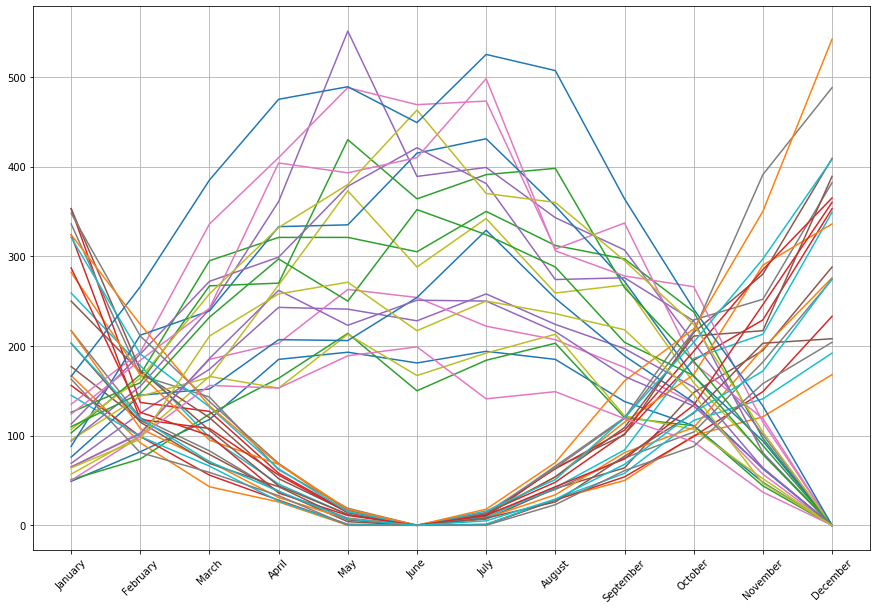

In [9]:
plt.figure(figsize=(15,10))
plt.plot(df_month)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [10]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
df_day = df.groupby(df['date'].dt.strftime('%A')).sum().T[days].T

In [11]:
df_day = df_day.T.reset_index()
df_day_p1 = df_day[df_day['daily sale']=='P1']
df_day_p2 = df_day[df_day['daily sale']=='P2']

df_day = df_day.groupby("shop").sum().T[coln]
df_day_p1 = df_day_p1.groupby("shop").sum().T[coln]
df_day_p2 = df_day_p2.groupby("shop").sum().T[coln]

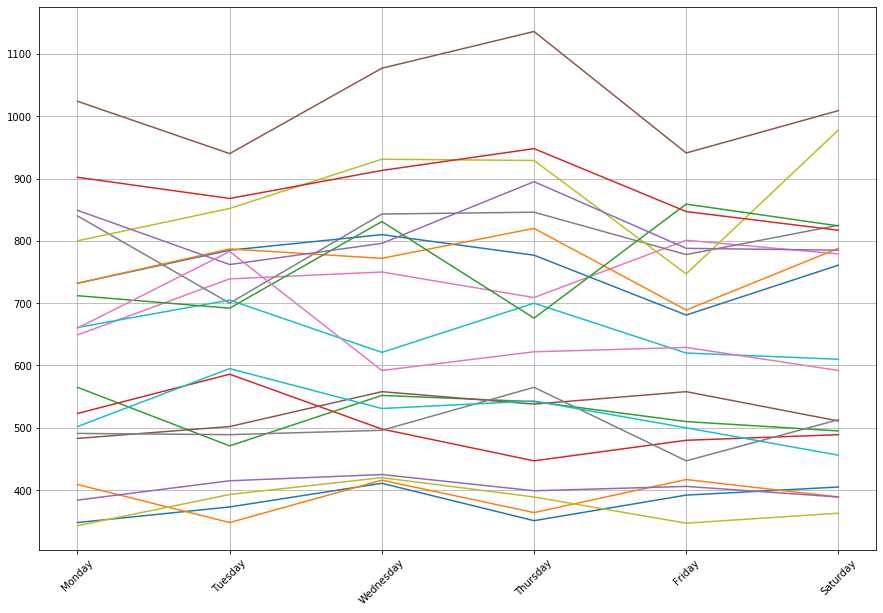

In [12]:
plt.figure(figsize=(15,10))
plt.plot(df_day)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

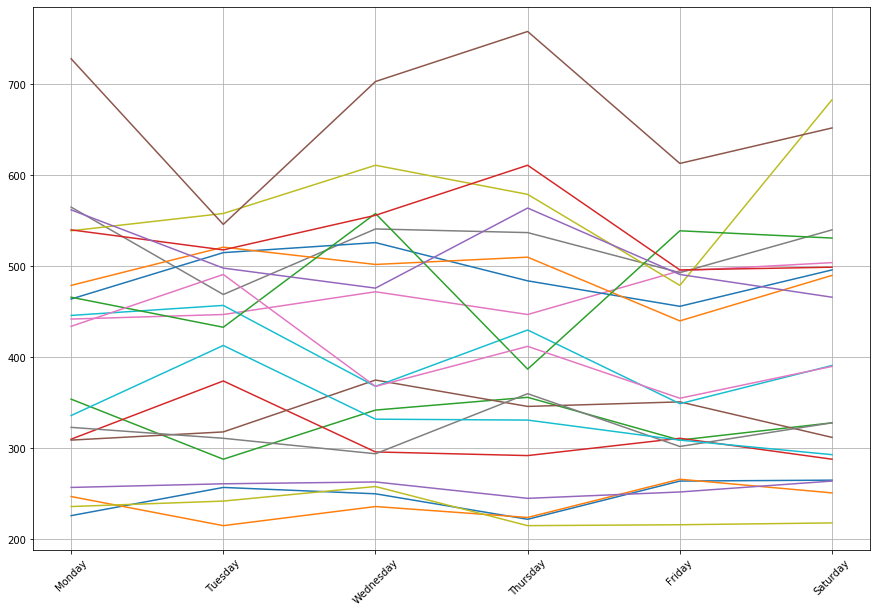

In [13]:
plt.figure(figsize=(15,10))
plt.plot(df_day_p1)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

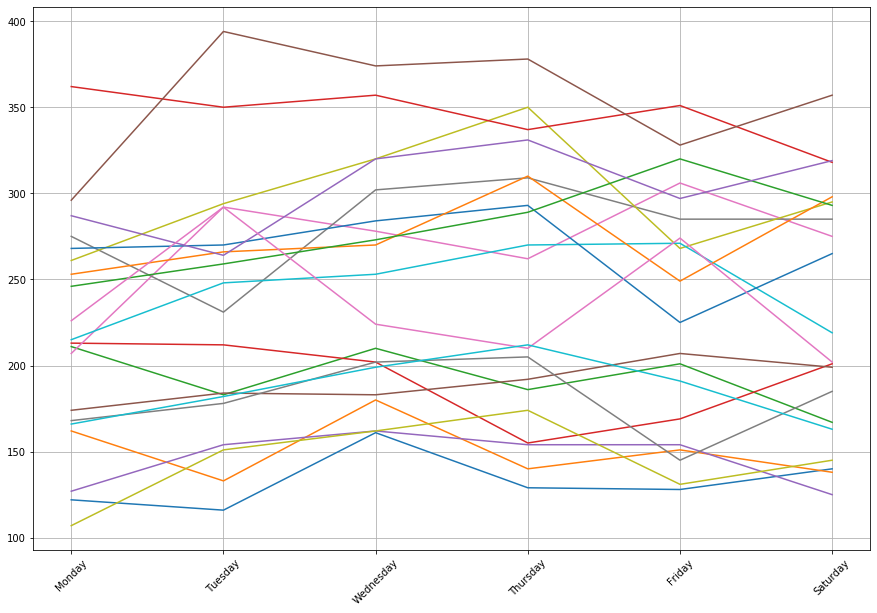

In [14]:
plt.figure(figsize=(15,10))
plt.plot(df_day_p2)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [15]:
df_day_p1['Total'] = df_day_p1.iloc[:, -20:-1].sum(axis=1)
df_day_p2['Total'] = df_day_p2.iloc[:, -20:-1].sum(axis=1)

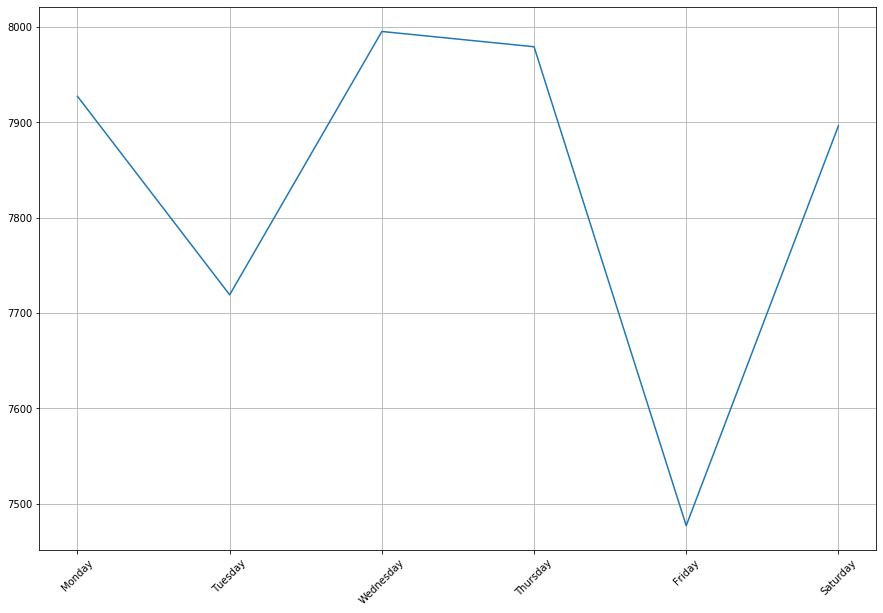

In [16]:
plt.figure(figsize=(15,10))
plt.plot(df_day_p1[['Total']])
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

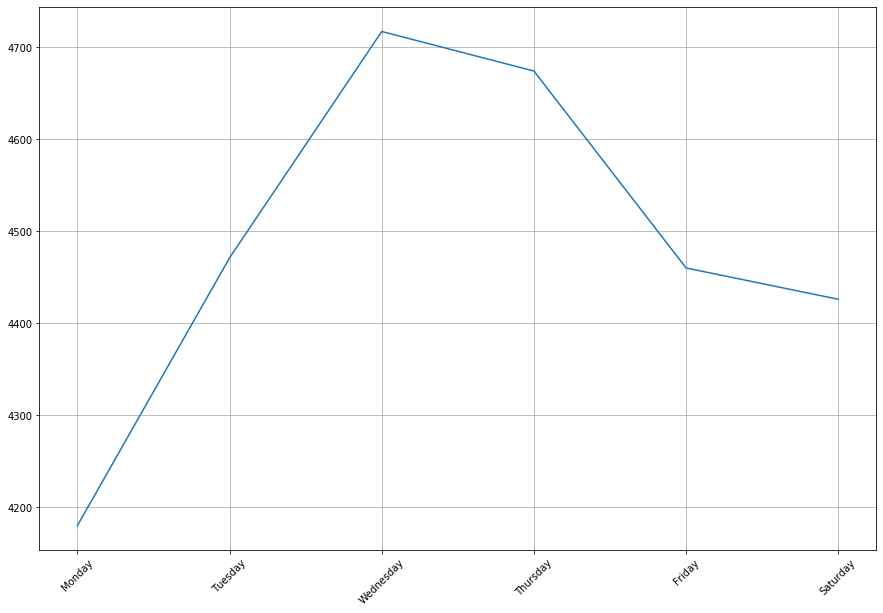

In [17]:
plt.figure(figsize=(15,10))
plt.plot(df_day_p2[['Total']])
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [18]:
df_month

shop         S1        S2        S3        S4        S5       ...  S16       \
daily sale   P1   P2   P1   P2   P1   P2   P1   P2   P1   P2  ...   P1   P2   
date                                                          ...             
January      49  167   51  156   69  177   65  217   57  145  ...  166  324   
February     82   92   74   99  125  117  103  120  100   99  ...  266  224   
March       118   43  124   56  174   79  185   83  166   66  ...  385  133   
April       185   26  164   28  243   38  203   37  153   27  ...  475   68   
May         193    0  214    1  241    4  263    8  213    1  ...  489   18   
June        181    0  150    0  228    0  254    0  167    0  ...  449    0   
July        194    0  184    1  258    7  222   12  192    1  ...  525   18   
August      185   29  203   28  224   41  207   40  213   29  ...  507   70   
September   138   50  120   54  197   64  176   75  122   58  ...  364  161   
October     111  100  111   99  154  148  136  104  107  117  ...  241  219   
November     48  121   44  149   64  195   57  182   52  141  ...  133  350   
December      0  168    0  233    0  288    0  274    0  192  ...    0  542   

shop        S17       S18       S19       S20       
daily sale   P1   P2   P1   P2   P1   P2   P1   P2  
date                                                
January     110  287   65  203   50  163   64  203  
February    147  126  102  115   99   81   96  119  
March       232  100  186   69  156   59  211   71  
April       297   36  262   43  153   33  258   38  
May         250   11  223    6  189    0  271    7  
June        352    0  251    0  199    0  217    0  
July        324   11  250    8  141    0  250    5  
August      288   43  216   26  149   23  236   29  
September   204   74  166   77  119   61  218   68  
October     167  134  133  125   93   88  146  126  
November     79  246   64  203   37  158   47  172  
December      0  360    0  208    0  204    0  275  

[12 rows x 40 columns]

In [19]:
df_days_months = df.groupby([df['date'].dt.strftime('%B'),df['date'].dt.strftime('%A')]).mean().T[months]
df_days_months = df_days_months.apply(np.ceil)

In [20]:
df_days_months

date            January                                            February  \
date             Friday Monday Saturday Thursday Tuesday Wednesday   Friday   
shop daily sale                                                               
S1   P1             3.0    2.0      2.0      2.0     1.0       3.0      5.0   
     P2             5.0    8.0      8.0      5.0     7.0       8.0      4.0   
S2   P1             3.0    2.0      2.0      3.0     3.0       2.0      4.0   
     P2             5.0    6.0      7.0      5.0     7.0       7.0      5.0   
S3   P1             4.0    3.0      3.0      3.0     2.0       3.0      6.0   
     P2             8.0    8.0      7.0      5.0     5.0       8.0      5.0   
S4   P1             3.0    3.0      2.0      3.0     3.0       3.0      3.0   
     P2             9.0   11.0      6.0      7.0    11.0       8.0      6.0   
S5   P1             3.0    2.0      2.0      2.0     3.0       3.0      6.0   
     P2             4.0    5.0      4.0      6.0     8.0       8.0      4.0   
S6   P1             4.0    3.0      4.0      4.0     1.0       4.0      7.0   
     P2             7.0    6.0      9.0     10.0    10.0       7.0      5.0   
S7   P1             4.0    5.0      3.0      4.0     5.0       5.0      9.0   
     P2            14.0    8.0     11.0     14.0    21.0      12.0      6.0   
S8   P1             2.0    4.0      4.0      4.0     4.0       5.0      8.0   
     P2            10.0   15.0      8.0      7.0    10.0       7.0      8.0   
S9   P1             5.0    5.0      7.0      5.0     3.0       6.0      5.0   
     P2            15.0   11.0     14.0     12.0    12.0      12.0      4.0   
S10  P1             3.0    4.0      5.0      4.0     4.0       4.0      5.0   
     P2            10.0    9.0      8.0     11.0    11.0      11.0     10.0   
S11  P1             3.0    3.0      4.0      4.0     2.0       7.0     10.0   
     P2            10.0    8.0     10.0     17.0     9.0      11.0      5.0   
S12  P1             6.0    4.0      5.0      5.0     5.0       4.0      3.0   
     P2            14.0   14.0     14.0     12.0    11.0      10.0      4.0   
S13  P1             4.0    5.0      6.0      4.0     4.0       4.0     10.0   
     P2            14.0   14.0     13.0     15.0    11.0      14.0      6.0   
S14  P1             4.0    5.0      5.0      5.0     4.0       8.0      4.0   
     P2            14.0   16.0     16.0     14.0    15.0       4.0      9.0   
S15  P1             5.0    3.0      4.0      6.0     5.0       4.0     11.0   
     P2            12.0   15.0     15.0     13.0     6.0      12.0      6.0   
S16  P1             5.0    7.0      7.0      8.0     5.0       6.0     11.0   
     P2             8.0   13.0      8.0     17.0    17.0      14.0     12.0   
S17  P1             4.0    4.0      4.0      5.0     5.0       4.0      5.0   
     P2            16.0   12.0      8.0      4.0    14.0      13.0      3.0   
S18  P1             3.0    3.0      3.0      2.0     2.0       3.0      2.0   
     P2             7.0    9.0      8.0      9.0     7.0       8.0      3.0   
S19  P1             1.0    2.0      2.0      3.0     3.0       3.0      5.0   
     P2             6.0    2.0      7.0      6.0     6.0      10.0      4.0   
S20  P1             2.0    2.0      2.0      4.0     3.0       3.0      4.0   
     P2            10.0    4.0      7.0     11.0     6.0       8.0      5.0   

date                                      ... November                   \
date            Monday Saturday Thursday  ... Saturday Thursday Tuesday   
shop daily sale                           ...                             
S1   P1            4.0      3.0      2.0  ...      2.0      3.0     3.0   
     P2            2.0      6.0      4.0  ...      4.0      7.0     5.0   
S2   P1            4.0      2.0      3.0  ...      3.0      2.0     2.0   
     P2            5.0      3.0      3.0  ...      6.0      6.0     3.0   
S3   P1            5.0      7.0      6.0  ...      4.0      4.0     4.0   
  

In [21]:
df_loc = pd.read_excel("locations.xls")
df_loc

,Type,ID,x,y
0,Shop,1,2,6
1,Shop,2,10,6
2,Shop,3,3,5
3,Shop,4,5,5
4,Shop,5,8,5
5,Shop,6,0,4
6,Shop,7,2,3
7,Shop,8,6,3
8,Shop,9,10,3
9,Shop,10,12,3


In [22]:
def get_distance(t1,n1,t2,n2):
    df1 = df_loc[(df_loc["Type"]==t1)&(df_loc["ID"]==n1)]
    df2 = df_loc[(df_loc["Type"]==t2)&(df_loc["ID"]==n2)]
    distance = np.abs(df1.iloc[0].x - df2.iloc[0].x) + np.abs(df1.iloc[0].y - df2.iloc[0].y)
    return distance

In [23]:
get_distance("Shop",1,"Warehouse",1)

5

In [24]:
def calculate_weight(p1,p2):
    return p1*.8 + p2*.4

In [25]:
df_days_months = df_days_months.reset_index()
for i in range(1,21):
    data1 = ['S'+str(i),'Total'] + calculate_weight(df_days_months.iloc[(i-1)*2][2:],df_days_months.iloc[(i-1)*2+1][2:]).tolist() 
    df_days_months.loc[-i] = data1

In [26]:
df_days_months = df_days_months.groupby(["shop","daily sale"]).sum().T[coln].T
df_days_months

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


date            January                                            February  \
date             Friday Monday Saturday Thursday Tuesday Wednesday   Friday   
shop daily sale                                                               
S1   P1             3.0    2.0      2.0      2.0     1.0       3.0      5.0   
     P2             5.0    8.0      8.0      5.0     7.0       8.0      4.0   
     Total          4.4    4.8      4.8      3.6     3.6       5.6      5.6   
S2   P1             3.0    2.0      2.0      3.0     3.0       2.0      4.0   
     P2             5.0    6.0      7.0      5.0     7.0       7.0      5.0   
     Total          4.4    4.0      4.4      4.4     5.2       4.4      5.2   
S3   P1             4.0    3.0      3.0      3.0     2.0       3.0      6.0   
     P2             8.0    8.0      7.0      5.0     5.0       8.0      5.0   
     Total          6.4    5.6      5.2      4.4     3.6       5.6      6.8   
S4   P1             3.0    3.0      2.0      3.0     3.0       3.0      3.0   
     P2             9.0   11.0      6.0      7.0    11.0       8.0      6.0   
     Total          6.0    6.8      4.0      5.2     6.8       5.6      4.8   
S5   P1             3.0    2.0      2.0      2.0     3.0       3.0      6.0   
     P2             4.0    5.0      4.0      6.0     8.0       8.0      4.0   
     Total          4.0    3.6      3.2      4.0     5.6       5.6      6.4   
S6   P1             4.0    3.0      4.0      4.0     1.0       4.0      7.0   
     P2             7.0    6.0      9.0     10.0    10.0       7.0      5.0   
     Total          6.0    4.8      6.8      7.2     4.8       6.0      7.6   
S7   P1             4.0    5.0      3.0      4.0     5.0       5.0      9.0   
     P2            14.0    8.0     11.0     14.0    21.0      12.0      6.0   
     Total          8.8    7.2      6.8      8.8    12.4       8.8      9.6   
S8   P1             2.0    4.0      4.0      4.0     4.0       5.0      8.0   
     P2            10.0   15.0      8.0      7.0    10.0       7.0      8.0   
     Total          5.6    9.2      6.4      6.0     7.2       6.8      9.6   
S9   P1             5.0    5.0      7.0      5.0     3.0       6.0      5.0   
     P2            15.0   11.0     14.0     12.0    12.0      12.0      4.0   
     Total         10.0    8.4     11.2      8.8     7.2       9.6      5.6   
S10  P1             3.0    4.0      5.0      4.0     4.0       4.0      5.0   
     P2            10.0    9.0      8.0     11.0    11.0      11.0     10.0   
     Total          6.4    6.8      7.2      7.6     7.6       7.6      8.0   
S11  P1             3.0    3.0      4.0      4.0     2.0       7.0     10.0   
     P2            10.0    8.0     10.0     17.0     9.0      11.0      5.0   
     Total          6.4    5.6      7.2     10.0     5.2      10.0     10.0   
S12  P1             6.0    4.0      5.0      5.0     5.0       4.0      3.0   
     P2            14.0   14.0     14.0     12.0    11.0      10.0      4.0   
     Total         10.4    8.8      9.6      8.8     8.4       7.2      4.0   
S13  P1             4.0    5.0      6.0      4.0     4.0       4.0     10.0   
     P2            14.0   14.0     13.0     15.0    11.0      14.0      6.0   
     Total          8.8    9.6     10.0      9.2     7.6       8.8     10.4   
S14  P1             4.0    5.0      5.0      5.0     4.0       8.0      4.0   
     P2            14.0   16.0     16.0     14.0    15.0       4.0      9.0   
     Total          8.8   10.4     10.4      9.6     9.2       8.0      6.8   
S15  P1             5.0    3.0      4.0      6.0     5.0       4.0     11.0   
     P2            12.0   15.0     15.0     13.0     6.0      12.0      6.0   
     Total          8.8    8.4      9.2     10.0     6.4       8.0     11.2   
S16  P1             5.0    7.0      7.0      8.0     5.0       6.0     11.0   
     P2             8.0   13.0      8.0     17.0    17.0      14.0     12.0   
     Total          7.2   10.8      8.8     13.2  